In [27]:
import numpy as np
import pandas as pd

In [28]:
fake_datasets=pd.read_csv(r'D:\fake-new-detector\News _dataset\Fake.csv', encoding='latin1')
fake_datasets.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [29]:
true_datasets=pd.read_csv(r'D:\fake-new-detector\News _dataset\True.csv', encoding='latin1')
true_datasets.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [30]:
#Adding a label column to distinguish between fake and true news
fake_datasets['label']=0
true_datasets['label']=1

In [31]:
fake_datasets.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [32]:
true_datasets.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [33]:
#combining both datasets
datasets=pd.concat([fake_datasets,true_datasets],ignore_index=True)
datasets.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [34]:
# Shuffle the dataset for unbiased training and testing
datasets = datasets.sample(frac=1, random_state=42).reset_index(drop=True)
datasets.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [35]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sajee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text=text.lower()  
    text=re.sub(f"[{re.escape(string.punctuation)}]", " ", text)  
    text=re.sub(r'\d+', ' ', text) 
    text=re.sub(r'\s+', ' ', text)  
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]) 
    return text

In [38]:
datasets['text'] = datasets['text'].apply(clean_text)
datasets['title'] = datasets['title'].apply(clean_text)
datasets.head()

,title,text,subject,date,label
0,ben stein call th circuit court committed âc...,st century wire say ben stein reputable profes...,US_News,"February 13, 2017",0
1,trump drop steve bannon national security council,washington reuters u president donald trump re...,politicsNews,"April 5, 2017",1
2,puerto rico expects u lift jones act shipping ...,reuters puerto rico governor ricardo rossello ...,politicsNews,"September 27, 2017",1
3,oops trump accidentally confirmed leaked israe...,monday donald trump embarrassed country accide...,News,"May 22, 2017",0
4,donald trump head scotland reopen golf resort,glasgow scotland reuters u presidential candid...,politicsNews,"June 24, 2016",1


In [39]:
from sklearn.model_selection import train_test_split
X = datasets[['title', 'text']]
y = datasets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(max_features=5000) 
vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=3,
    stop_words='english',
    ngram_range=(1,2)
)
X_train_vectorized = vectorizer.fit_transform(X_train['text'] + ' ' + X_train['title'])
X_test_vectorized = vectorizer.transform(X_test['text'] + ' ' + X_test['title']) 
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
base_model = MultinomialNB()
model = CalibratedClassifierCV(estimator=base_model, cv=5)
model.fit(X_train_vectorized, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
y_pred = model.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9629175946547884
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      4696
           1       0.96      0.96      0.96      4284

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980

Confusion Matrix:
 [[4521  175]
 [ 158 4126]]


In [40]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

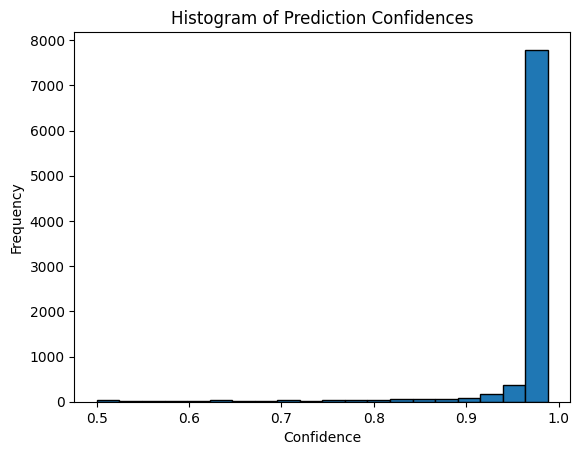

In [41]:
import matplotlib.pyplot as plt

probs = model.predict_proba(X_test_vectorized)
max_conf = probs.max(axis=1)

plt.hist(max_conf, bins=20, edgecolor='black')
plt.title("Histogram of Prediction Confidences")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.show()
